<a href="https://colab.research.google.com/github/PuiPu/data_sci_final_project/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 使用個人訪問令牌克隆私有存儲庫
!git clone https://github.com/PuiPu/data_sci_final_project.git

Cloning into 'data_sci_final_project'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 289.81 KiB | 1.16 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
import pandas as pd

# Load the uploaded CSV file to check its structure
file_path = '/content/data_sci_final_project/aapl_us_d.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()


,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [4]:
import numpy as np

# Convert Date to datetime format and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check for missing values
missing_values = data.isnull().sum()

# Use only the 'Close' column for this task
close_prices = data['Close']

# Display basic information about the data
missing_values, close_prices.describe()


(Open      0
 High      0
 Low       0
 Close     0
 Volume    0
 dtype: int64,
 count    10080.000000
 mean        24.228588
 std         48.513977
 min          0.054803
 25%          0.292288
 50%          0.883006
 75%         21.649000
 max        234.820000
 Name: Close, dtype: float64)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Define a function to create sequences for time series prediction
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

# Define sequence length
sequence_length = 60  # Use 60 days of data to predict the next day's price

# Create sequences
X, y = create_sequences(close_prices_scaled, sequence_length)

# Split into training and testing datasets
train_size = int(len(X) * 0.8)  # 80% training data
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8016, 60, 1), (2004, 60, 1), (8016, 1), (2004, 1))

In [ ]:
!pip install tensorflow

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Define the GRU model
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(sequence_length, 1)),  # First GRU layer
    Dropout(0.2),  # Dropout for regularization
    GRU(50),  # Second GRU layer
    Dropout(0.2),
    Dense(1)  # Output layer to predict the next price
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=8,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - loss: 1.3008e-04 - val_loss: 4.8075e-04
Epoch 2/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - loss: 1.5239e-05 - val_loss: 0.0014
Epoch 3/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - loss: 1.2123e-05 - val_loss: 7.3913e-04
Epoch 4/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - loss: 1.2133e-05 - val_loss: 3.1755e-04
Epoch 5/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - loss: 1.3294e-05 - val_loss: 9.7095e-04
Epoch 6/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - loss: 1.3089e-05 - val_loss: 4.6856e-04
Epoch 7/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - loss: 1.3567e-05 - val_loss: 1.8924e-04
Epoch 8/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - loss: 1.1353e-05 - val_loss: 0.0013


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


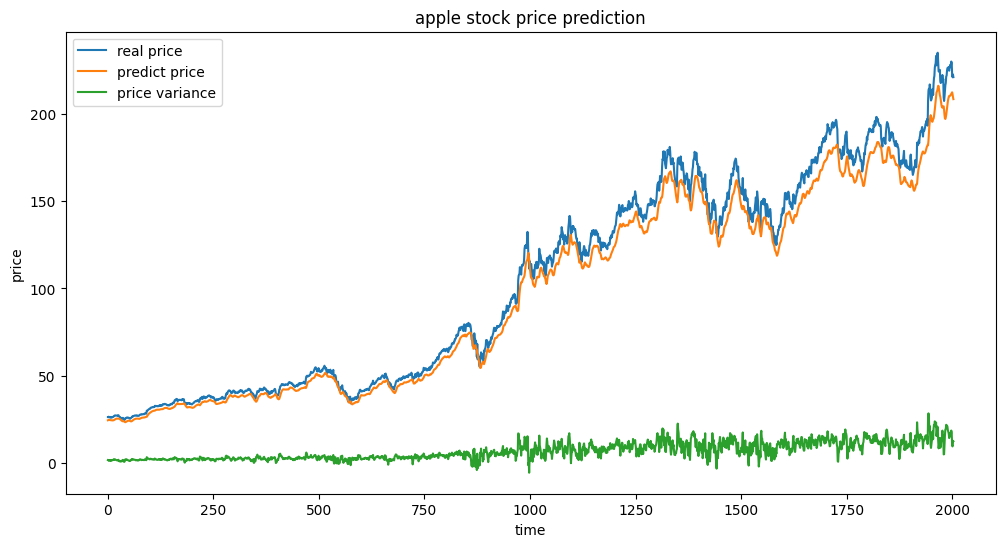

In [8]:
predicted_prices_scaled = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted_prices_scaled)
actual_prices = scaler.inverse_transform(y_test)

price_difference = actual_prices.flatten() - predicted_prices.flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='real price')
plt.plot(predicted_prices, label='predict price')
plt.plot(price_difference, label='price variance')
plt.legend()
plt.title('apple stock price prediction')
plt.xlabel('time')
plt.ylabel('price')
plt.show()